In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

In [ ]:
df1 = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\zomato.csv")
df1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [32]:
df1 = df1.drop(['url', 'address','phone','menu_item','dish_liked'],axis = 1)
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [5]:
df1.isnull().sum()[df1.isnull().sum()>0]

rate                           7775
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
dtype: int64

In [ ]:
df1.isnull().sum()[df1.isnull().sum()>0]

In [6]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
def handlerate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [8]:
def handlerate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [9]:
df1['rate'] = df1['rate'].apply(handlerate)
df1['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
df1['rate'].fillna(df1['rate'].mean(),inplace=True)

In [11]:
df1.isnull().sum()[df1.isnull().sum()>0]

location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
dtype: int64

In [12]:
df1.dropna(inplace=True)

In [13]:
df1.isnull().sum()[df1.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
df1.rename({'approx_cost(for two people)':'Cost2people',
             'listed_in(type)':'Type'},axis=1, inplace=True)

In [15]:
df1.drop(['listed_in(city)'],axis=1 , inplace=True)

In [16]:
df1['Cost2people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [17]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

In [18]:

df1['Cost2people'] = df1['Cost2people'].apply(handlecomma)
df1['Cost2people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [19]:
rest_types = df1['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [22]:
def handle_rest_type(value):
    if(value in rest_types_lessthan_1000):
        return 'others'
    else:
        return value

In [23]:
df1['rest_type'] = df1['rest_type'].apply(handle_rest_type)

NameError: name 'rest_types_lessthan_1000' is not defined

In [24]:
df1['rest_type'].value_counts()

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [25]:
location = df1['location'].value_counts(ascending=False)
location_lessthan_300 = location[location < 300]


In [26]:

def handle_location(value):
    if value in location_lessthan_300:
        return 'others'
    else:
        return value

In [27]:
df1['location'] = df1['location'].apply(handle_location)

In [28]:
cuisines_lessthan_100 = cuisines[cuisines<100]

NameError: name 'cuisines' is not defined

In [33]:
df1['rate'].unique()

def handlerate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df1['rate'] = df1['rate'].apply(handlerate)
df1['rate'].head()


df1['rate'].fillna(df1['rate'].mean(),inplace=True)

df1.isnull().sum()[df1.isnull().sum()>0]

df1.dropna(inplace=True)

df1.isnull().sum()[df1.isnull().sum()>0]

df1.rename({'approx_cost(for two people)':'Cost2people',
             'listed_in(type)':'Type'},axis=1, inplace=True)


df1.drop(['listed_in(city)'],axis=1 , inplace=True)


df1['Cost2people'].unique()

def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)


df1['Cost2people'] = df1['Cost2people'].apply(handlecomma)
df1['Cost2people'].unique()


rest_types = df1['rest_type'].value_counts(ascending=False)
rest_types

rest_types = df1['rest_type'].value_counts(ascending=False)
rest_types


def handle_rest_type(value):
    if(value in rest_types_lessthan_1000):
        return 'others'
    else:
        return value



df1['rest_type'] = df1['rest_type'].apply(handle_rest_type)


df1['rest_type'].value_counts()


df1['location'].value_counts()


location = df1['location'].value_counts(ascending=False)
location_lessthan_300 = location[location < 300]


def handle_location(value):
    if value in location_lessthan_300:
        return 'others'
    else:
        return value



df1['location'] = df1['location'].apply(handle_location)



df1['location'] = df1['location'].apply(handle_location)



df1['cuisines'].value_counts()


cuisines = df1['cuisines'].value_counts(ascending=False)


cuisines_lessthan_100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if value in cuisines_lessthan_100 :
        return 'others'
    else:
        return value

df1['cuisines'] = df1['cuisines'].apply(handle_cuisines)


df1['cuisines'].value_counts()



df1['Type'].value_counts()


df1_reviews = df1 


















NameError: name 'rest_types_lessthan_1000' is not defined

In [34]:
from wordcloud import WordCloud

In [35]:
from nltk.corpus import stopwords 

In [37]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,reviews_list,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [39]:
df2 = df1[['reviews_list','rate']]

In [42]:
df2.rename({'reviews_list':'X','rate':'Y'},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23288\860578319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename({'reviews_list':'X','rate':'Y'},inplace=True)


In [43]:
df2.head()

,reviews_list,rate
0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1
1,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1
2,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8
3,"[('Rated 4.0', ""RATED\n Great food and proper...",3.7
4,"[('Rated 4.0', 'RATED\n Very good restaurant ...",3.8


In [46]:
df1.Type.value_counts()

Type
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: count, dtype: int64

In [52]:
df1_type_delivery = df1[df1['Type']=='Delivery']

In [53]:
df1_type_dineout = df1[df1['Type']=='Dine-out']

In [54]:
df1_type_Desserts = df1[df1['Type']=='Desserts']

In [55]:
df1_type_Cafes = df1[df1['Type']=='Cafes']

In [56]:
df1_type_Drinksnightlife = df1[df1['Type']=='Drinks & nightlife']

In [57]:
df1_type_Buffet = df1[df1['Type']=='Buffet']

In [58]:
df1_type_Pubsandbars = df1[df1['Type']=='Pubs and bars']

In [ ]:
# entire dataset

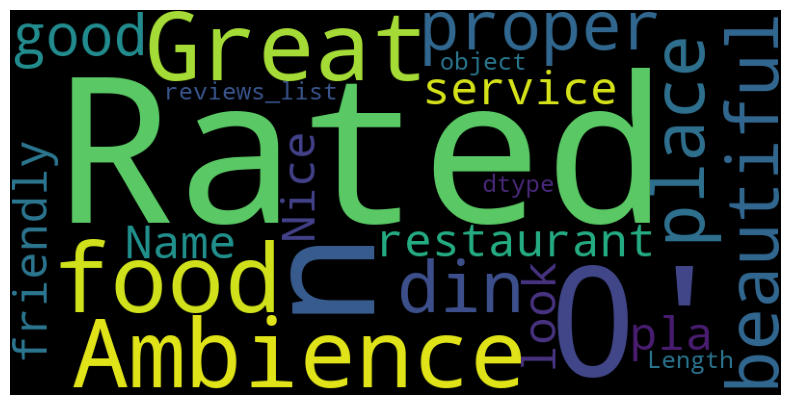

In [44]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df2['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
# delivery:=

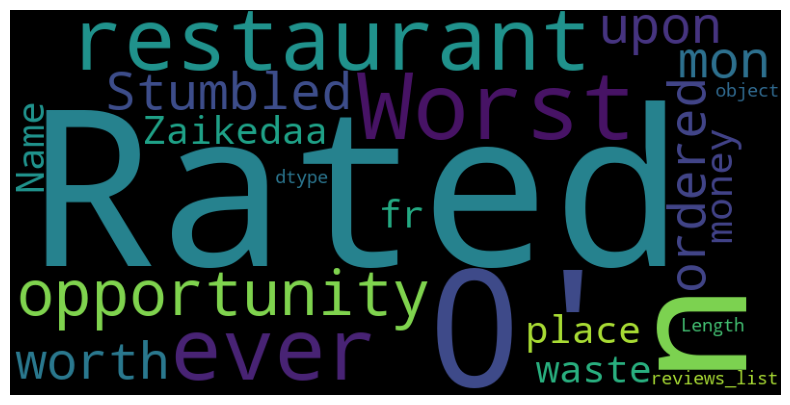

In [59]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_delivery['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#dineout

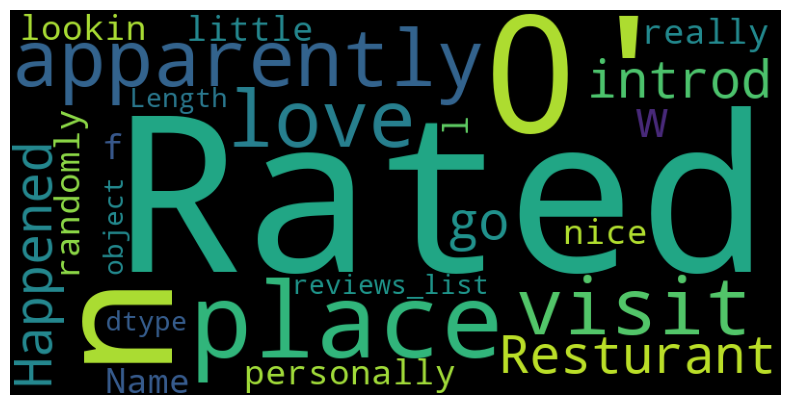

In [60]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_dineout['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#desserts

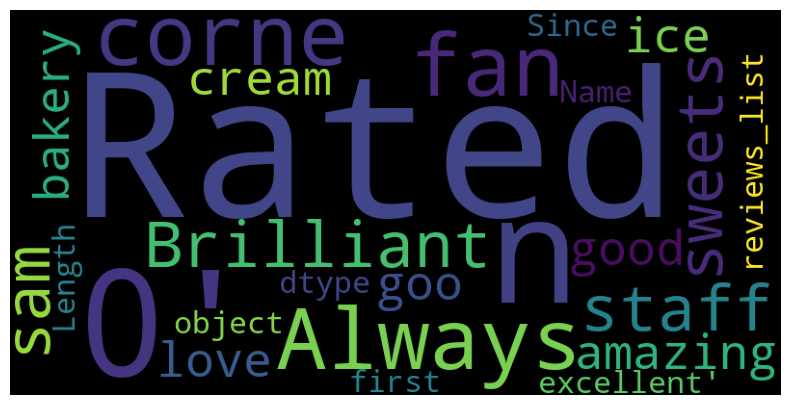

In [61]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_Desserts['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#cafes

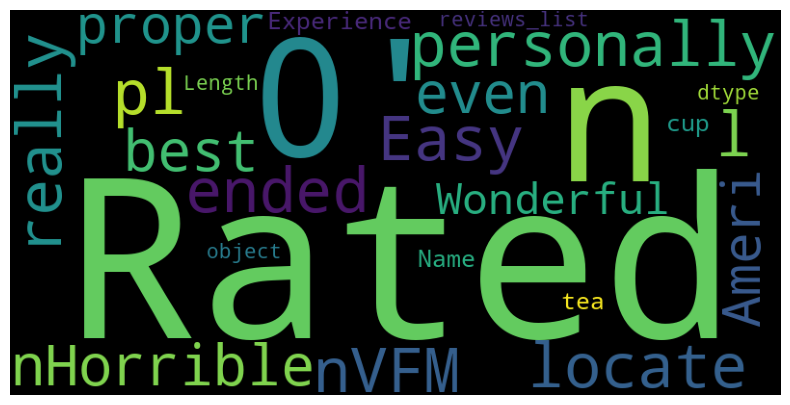

In [65]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_Cafes['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#Drinks & nightlife

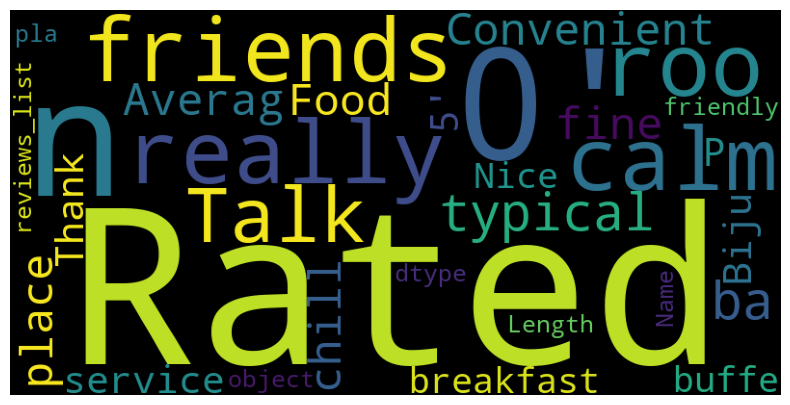

In [67]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_Drinksnightlife['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#buffet

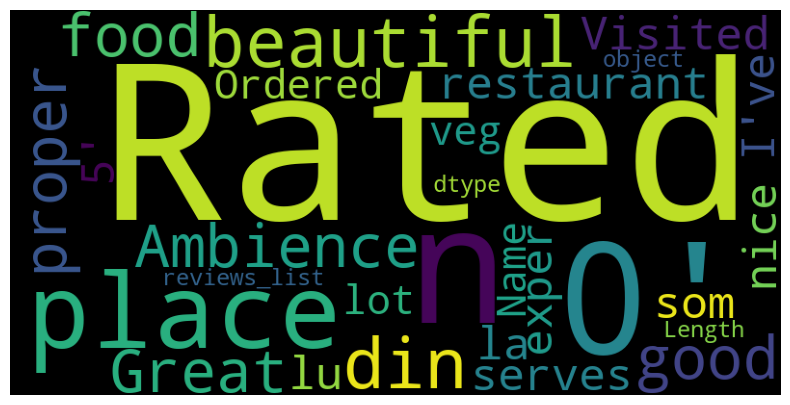

In [68]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_Buffet['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#df1_type_Pubsandbars

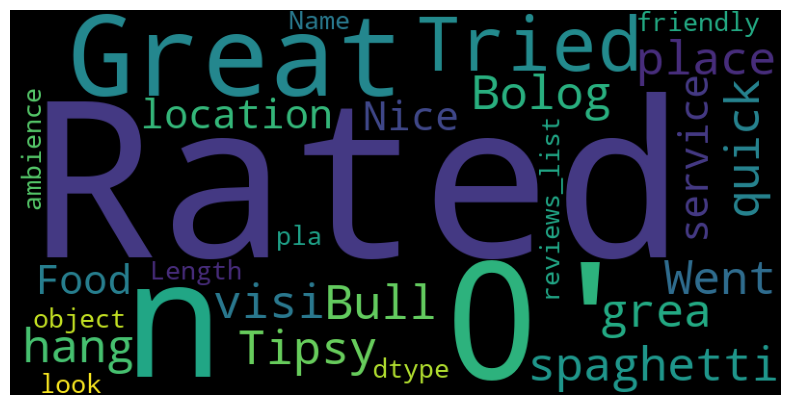

In [69]:
cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df1_type_Pubsandbars['reviews_list']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()

In [ ]:
#### wordcloud for quickbites , casual dining , cafe


from wordcloud import WordCloud



Generate word clouds for each cluster
for cluster in df['cluster'].unique():
    text = ' '.join(df[df['cluster'] == cluster]['cuisines'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()


df_wordcloud = df1_sentiment # backup
df_wordcloud.head()


df_wordcloud = df_wordcloud[['Y','X']]
df_wordcloud.head()


from nltk.corpus import stopwords 


from wordcloud import WordCloud


cloud = WordCloud(stopwords=stopwords.words('english'),width=800,height=400,max_words=1000).generate(str(df_wordcloud['X']))


plt.figure(figsize=(20,5))

plt.imshow(cloud)

plt.axis('off')
plt.show()


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Example path to your TrueType font file (replace with your actual path)
font_path = font_path = r"C:\Users\HARSH\anaconda3\Lib\site-packages\spyder\fonts"
  # Example path to Arial font

# Generate word cloud with the specified font
cloud = WordCloud(stopwords=stopwords.words('english'),
                  width=800, height=400,
                  max_words=1000,
                  font_path=font_path).generate(str(df_wordcloud['X']))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


df_wordcloud_great = df_wordcloud[df_wordcloud['Y'] == 'great']
df_wordcloud_great.shape


df_wordcloud_great.head()


df_wordcloud_great_shuffled = df_wordcloud_great.sample(n = len(df_wordcloud_great))



df_wordcloud_great_shuffled = df_wordcloud_great_shuffled.reset_index(drop = True)
df_wordcloud_great_shuffled.head()



df_wordcloud_great_shuffled.shape


df_wordcloud_great_shuffled = df_wordcloud_great_shuffled.iloc[:100 , :]
df_wordcloud_great_shuffled.head()
df_wordcloud_great_shuffled.shape


text = ' '.join(df_wordcloud_great_shuffled['X'].astype(str))


# Generate WordCloud without custom font
cloud = WordCloud(stopwords=stopwords.words('english'),
                  width=800, height=400,
                  max_words=1000).generate(text)

# Display the WordCloud
plt.figure(figsize=(20, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
